In [13]:
import pandas as pd
import jieba
from tkinter import _flatten
import matplotlib.pyplot as plt
from wordcloud import WordCloud  # 绘制词云所需要的库

In [14]:
with open('../day19/tmp/Python爬虫实践《流浪地球》豆瓣影评分析-数据&代码&PPT/stoplist.txt', 'r', encoding='utf-8') as f:  # stoplist.txt中的内容为停用词，文本文件是从网上寻找到的
    stopWords = f.read() 
# split方法用于切割字符，默认是以换行或空格切割字符
stopWords = ['\n', '', ' '] + stopWords.split()  # 添加一些列表中没有的停用词

In [15]:
data = pd.read_csv('../day19/tmp/Python爬虫实践《流浪地球》豆瓣影评分析-数据&代码&PPT/douban.csv', encoding='GB18030')  # 当初douban.csv是使用GB18030格式保存的，所以这里要用相同的格式打开
dataCut = data['短评正文'].apply(jieba.lcut)  # 分词,jieba库的lcut方法可以对文字进行分词操作，将文字自动转换为一个个词语

In [23]:
def my_word_cloud(data=None, stopWords=None, img=None):  # 自定义函数
    dataCut = data.apply(jieba.lcut)  # 分词
    dataAfter = dataCut.apply(lambda x: [i for i in x if i not in stopWords])  # 去除停用词(去除列表中的停用词)
    # 统计词频，Series是序列的格式，value_counts()方法用于统计各个词语出现的次数，_flatten用于将多维数据转换为一维
    wordFre = pd.Series(_flatten(list(dataAfter))).value_counts()  
    mask = plt.imread(img)  # imread用于读取图片的操作
    # 设置字体用来防止中文乱码，这里的字体路径在C:\Windows\Fonts\simhei.ttf中选择自己想要的字体
    font_path = r"C:\Windows\Fonts\simhei.ttf"  # 要设置字体的路径
    wc = WordCloud(font_path=font_path, mask=mask, background_color="white")  # font_path表示字体的路径，mask表示背景图片，background_color表示背景色
    wc.fit_words(wordFre)  # fit_words用于绘制词云
    plt.imshow(wc)  # imshow用于在界面上显示词云
    plt.axis('off')  # 表示去掉坐标
    plt.show()

In [24]:
index_negative = data['评分'] < 30      # 差评数据的索引，将小于30分的设置为差评
index_positive = data['评分'] >= 30     # 好评数据的索引

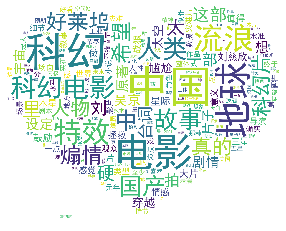

In [25]:
# 好评词云绘制
my_word_cloud(data=data['短评正文'][index_positive], stopWords=stopWords, img="../day19/tmp/Python爬虫实践《流浪地球》豆瓣影评分析-数据&代码&PPT/aixin.jpg")  

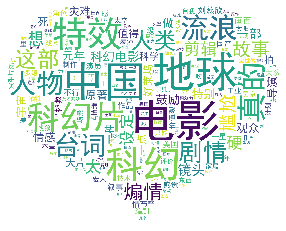

In [26]:
# 差评词云绘制
my_word_cloud(data=data['短评正文'][index_negative], stopWords=stopWords, img="../day19/tmp/Python爬虫实践《流浪地球》豆瓣影评分析-数据&代码&PPT/aixin.jpg")  # 差评数据的词云

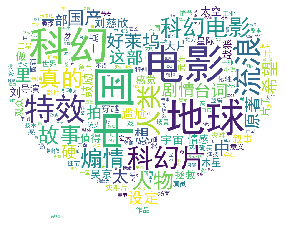

In [27]:
# 整体评论数据的词云的绘制
my_word_cloud(data=data['短评正文'], stopWords=stopWords, img="../day19/tmp/Python爬虫实践《流浪地球》豆瓣影评分析-数据&代码&PPT/aixin.jpg")  